In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import svm, preprocessing 
from sklearn.metrics import classification_report, confusion_matrix , accuracy_score
import matplotlib.pyplot as plt
import numpy as np
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.manifold import TSNE
import matplotlib.cm as cm
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier


In [16]:
df_train = pd.read_csv("pendigits-tra.csv")
df_test = pd.read_csv("pendigits-tes.csv")

In [17]:
df_train.shape

(7493, 17)

In [18]:
df_train.columns

Index([' 47', '100', ' 27', ' 81', ' 57', ' 37', ' 26', '  0', '  0.1', ' 23',
       ' 56', ' 53', '100.1', ' 90', ' 40', ' 98', ' 8'],
      dtype='object')

In [19]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7493 entries, 0 to 7492
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0    47     7493 non-null   int64
 1   100     7493 non-null   int64
 2    27     7493 non-null   int64
 3    81     7493 non-null   int64
 4    57     7493 non-null   int64
 5    37     7493 non-null   int64
 6    26     7493 non-null   int64
 7     0     7493 non-null   int64
 8     0.1   7493 non-null   int64
 9    23     7493 non-null   int64
 10   56     7493 non-null   int64
 11   53     7493 non-null   int64
 12  100.1   7493 non-null   int64
 13   90     7493 non-null   int64
 14   40     7493 non-null   int64
 15   98     7493 non-null   int64
 16   8      7493 non-null   int64
dtypes: int64(17)
memory usage: 995.3 KB


In [20]:
df_train = df_train.rename(columns={' 8': 'Class'})
df_test = df_test.rename(columns={' 8': 'Class'})

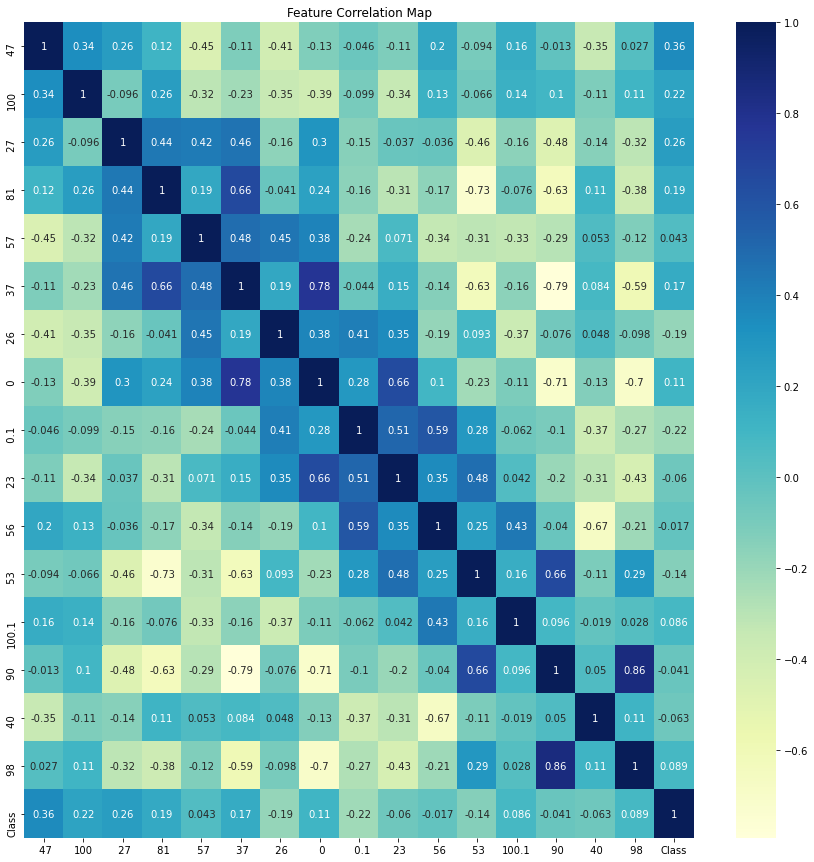

In [21]:
fig, ax = plt.subplots(figsize=(15,15))         
sns.heatmap(df_train.corr(),cmap="YlGnBu", annot=True);
plt.title("Feature Correlation Map");

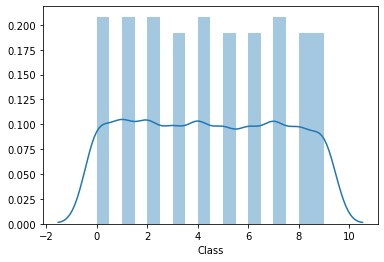

In [22]:
sns.distplot(df_train['Class'])

In [23]:
duplicates = df_train[df_train.duplicated()]

len(duplicates)

0

In [24]:
df_train.describe()

,47,100,27,81,57,37,26,0,0.1,23,56,53,100.1,90,40,98,Class
count,7493.000000,7493.000000,7493.000000,7493.000000,7493.000000,7493.000000,7493.000000,7493.000000,7493.000000,7493.000000,7493.000000,7493.000000,7493.000000,7493.000000,7493.000000,7493.000000,7493.000000
mean,37.383024,84.677299,40.007340,82.889764,50.877486,65.048178,51.475244,44.605632,57.137595,34.070599,61.418124,35.779794,54.693714,35.793541,46.814627,28.556119,4.430402
std,33.324063,16.848615,26.257347,19.639880,34.929460,27.377250,30.680711,30.657194,33.676120,27.461524,37.133187,27.496951,22.595228,33.219926,41.534491,35.804498,2.876877
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.000000,76.000000,20.000000,70.000000,17.000000,48.000000,28.000000,22.000000,30.000000,7.000000,25.000000,12.000000,41.000000,7.000000,0.000000,0.000000,2.000000
50%,31.000000,89.000000,39.000000,89.000000,56.000000,71.000000,54.000000,42.000000,60.000000,33.000000,74.000000,32.000000,53.000000,28.000000,39.000000,8.000000,4.000000
75%,61.000000,100.000000,58.000000,100.000000,81.000000,86.000000,75.000000,65.000000,88.000000,55.000000,98.000000,57.000000,69.000000,48.000000,100.000000,51.000000,7.000000
max,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,9.000000


### SVM Classifier

In [25]:
X_train = df_train.drop(columns=["Class"])
y_train = df_train.Class
X_test = df_test.drop(columns=["Class"])
y_test = df_test.Class

In [41]:
def estimators(features, labels, estimator):
    
    if (estimator == 'SVM'):
        model = svm.SVC().fit(X_train, y_train )
        text = 'SVM'
    if (estimator == 'DecisionTree'):
        model = DecisionTreeClassifier(max_depth=10).fit(X_train, y_train)
        text = 'Decision Tree'
    if (estimator == 'GB'):
        model = GradientBoostingClassifier().fit(X_train, y_train)
        text = 'GB'
    
    train_prediction = model.predict(X_train)
    prediction = model.predict(X_test)
    print(text, " Train Accuracy : ", accuracy_score(y_train,train_prediction)*100)
    print(text, " Test Accuracy : ", accuracy_score(y_test,prediction)*100)
    print("\n\t\tTEST DATA METRICS")
    print(text, " Confusion Matrix: ",confusion_matrix(y_test, prediction))
    print(text, " Report : ")
    print(classification_report(y_test,prediction))  

In [42]:
print('Decision Tree')
estimators(X_train, y_train, 'DecisionTree')

Decision Tree
Decision Tree  Train Accuracy :  99.11917789937274
Decision Tree  Test Accuracy :  91.47841006577066

		TEST DATA METRICS
Decision Tree  Confusion Matrix:  [[347   1   0   0   0   0   0   1  12   2]
 [  0 319  42   2   0   0   0   1   0   0]
 [  0  15 342   2   0   1   2   2   0   0]
 [  1   9   4 317   0   1   0   3   0   1]
 [  0   3   0   1 347   6   4   0   0   3]
 [  0   3   0  31   4 266   0   4   2  25]
 [ 10   7   2   0   0   2 313   1   1   0]
 [  0  16   3  11   0   0   2 329   2   1]
 [  7   1   0   0   0   2   1  15 308   1]
 [  1   4   0   5   6   2   0   4   3 311]]
Decision Tree  Report : 
              precision    recall  f1-score   support

           0       0.95      0.96      0.95       363
           1       0.84      0.88      0.86       364
           2       0.87      0.94      0.90       364
           3       0.86      0.94      0.90       336
           4       0.97      0.95      0.96       364
           5       0.95      0.79      0.87      

In [43]:
print('SVM')
estimators(X_train, y_train, 'SVM')

SVM
SVM  Train Accuracy :  99.66635526491392
SVM  Test Accuracy :  98.16985987989706

		TEST DATA METRICS
SVM  Confusion Matrix:  [[353   0   0   0   0   0   0   0  10   0]
 [  0 350  13   0   1   0   0   0   0   0]
 [  0   2 362   0   0   0   0   0   0   0]
 [  0   1   0 333   0   0   0   0   0   2]
 [  0   0   0   0 359   4   1   0   0   0]
 [  0   0   0   4   0 329   0   0   0   2]
 [  0   0   0   0   0   0 336   0   0   0]
 [  0  12   1   0   0   0   0 347   0   4]
 [  0   0   0   0   0   1   0   0 334   0]
 [  0   2   0   0   0   0   0   3   1 330]]
SVM  Report : 
              precision    recall  f1-score   support

           0       1.00      0.97      0.99       363
           1       0.95      0.96      0.96       364
           2       0.96      0.99      0.98       364
           3       0.99      0.99      0.99       336
           4       1.00      0.99      0.99       364
           5       0.99      0.98      0.98       335
           6       1.00      1.00      1.00  

In [44]:
print('Gradient Boosting')
estimators(X_train, y_train, 'GB')

Gradient Boosting
GB  Train Accuracy :  100.0
GB  Test Accuracy :  96.19674006291106

		TEST DATA METRICS
GB  Confusion Matrix:  [[342   0   0   0   0   0   0   0  21   0]
 [  0 341  21   0   1   1   0   0   0   0]
 [  0   3 360   0   0   0   0   1   0   0]
 [  0   3   0 331   0   0   0   1   0   1]
 [  0   0   0   0 364   0   0   0   0   0]
 [  0   0   0   6   0 309   1   0   4  15]
 [  0   0   0   0   0   1 334   0   1   0]
 [  0  24   4   0   0   0   0 327   0   9]
 [  0   0   1   0   0   0   0   0 334   0]
 [  0   6   0   6   0   0   0   1   1 322]]
GB  Report : 
              precision    recall  f1-score   support

           0       1.00      0.94      0.97       363
           1       0.90      0.94      0.92       364
           2       0.93      0.99      0.96       364
           3       0.97      0.99      0.97       336
           4       1.00      1.00      1.00       364
           5       0.99      0.92      0.96       335
           6       1.00      0.99      1.00    

In [45]:
train_accuracies = [99.119,99.666,100]
test_accuracies = [91.507,98.169,96.196]
models = ["Decision Tree","SVM","Gradient Boositng"]

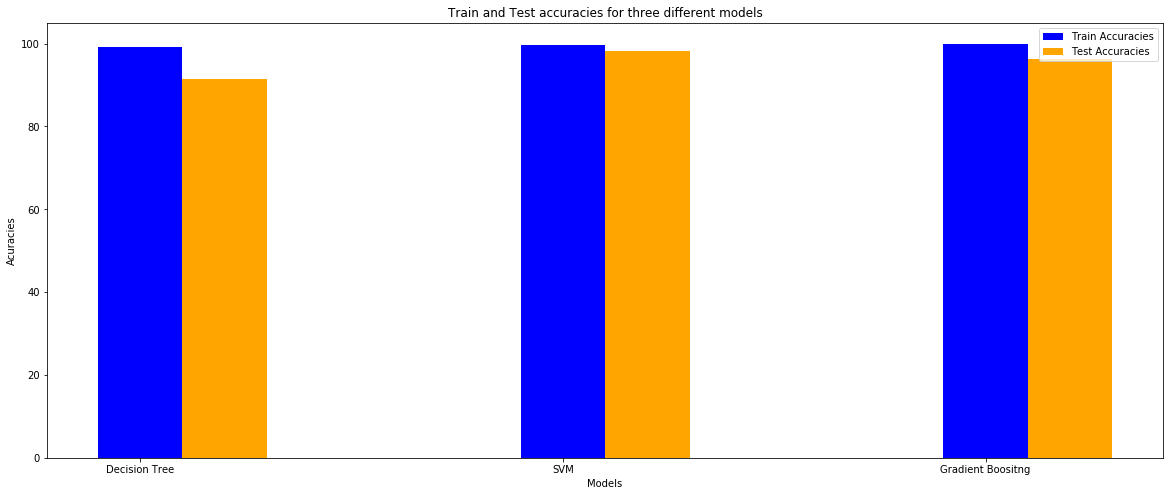

In [46]:
X_axis = np.arange(len(models))
f, ax = plt.subplots(figsize=(20,8))  
plt.bar(X_axis + 0.00, train_accuracies,0.2 ,color = "b",label = 'Train Accuracies')
plt.bar(X_axis + 0.2, test_accuracies, 0.2,color = "orange" , label = 'Test Accuracies')


plt.xticks(X_axis, models)
plt.xlabel("Models")
plt.ylabel("Acuracies")
plt.title("Train and Test accuracies for three different models")
plt.legend()
plt.show()

### Feature Selection

In [151]:
def estimators_for_selected_features(train_features,test_features, train_labels,test_label, estimator,num_of_features):
    X_train_selected = SelectKBest(chi2, k=i).fit_transform(train_features, train_labels)
    X_test_selected = SelectKBest(chi2, k=i).fit_transform(test_features, test_label)
    if (estimator == 'SVM'):
        model = svm.SVC().fit(X_train_selected, train_labels)
        text = 'SVM'
    if (estimator == 'DecisionTree'):
        model = DecisionTreeClassifier(max_depth=10).fit(X_train_selected, train_labels)
        text = 'Decision Tree'
    if (estimator == 'GB'):
        model = GradientBoostingClassifier().fit(X_train_selected, train_labels)
        text = 'Gradient Boosting'
    
    train_prediction = model.predict(X_train_selected)
    prediction = model.predict(X_test_selected)
    print(text, " Train Accuracy : ", accuracy_score(train_labels,train_prediction)*100)
    print(text, " Test Accuracy : ", accuracy_score(test_label,prediction)*100)
    print("\n\t\tTEST DATA METRICS")
    print(text, " Confusion Matrix: ",confusion_matrix(test_label, prediction))
    print(text, " Report : ")
    print(classification_report(test_label,prediction))  

In [152]:
ms = ["SVM","DecisionTree","GB"]
for i in [5,7,10]:
    
    for m in ms:
        print(m , "Number of selected features", i)
        estimators_for_selected_features(X_train,X_test,y_train,y_test, m, i)

SVM Number of selected features 5
SVM  Train Accuracy :  86.17376217803283
SVM  Test Accuracy :  48.41292536459822

		TEST DATA METRICS
SVM  Confusion Matrix:  [[ 36   0   0   0   0   0   0   0 327   0]
 [  0 145  47   0 107   2   0   0   0  63]
 [  0  81 153   0 127   0   0   0   1   2]
 [  0  17   0 311   0   5   0   0   0   3]
 [  0  23  78   0  18   0   0   0   0 245]
 [ 11   2   0  80   0 141   0   0  17  84]
 [  0   1   0   0   0   2 150   1 132  50]
 [  1  70   7   1  16   0   1 206  60   2]
 [ 25   0   0   0   0   1   1   0 306   2]
 [  1  11   2  95   0   0   0   0   0 227]]
SVM  Report : 
              precision    recall  f1-score   support

           0       0.49      0.10      0.16       363
           1       0.41      0.40      0.41       364
           2       0.53      0.42      0.47       364
           3       0.64      0.93      0.76       336
           4       0.07      0.05      0.06       364
           5       0.93      0.42      0.58       335
           6   

### plotting the number of features VS the accuracies

In [159]:
Baseline_dt = [90.764,90.764,90.764]
Baseline_svm = [98.169,98.169,98.169]
Baseline_gb = [96.196]*3
fs_dt = [39.29,60.709,88.933]
fs_svm = [52.45 ,72.3477 , 94.566]
fs_gb = [57.42 ,65.713 , 93.53]

In [154]:
def k_accuracies(baseline, model):
    fig, ax = plt.subplots()
    x_axis = [5,7,10]
    ax.plot(x_axis, model, 'o-', label='Accuracy')
    ax.plot(x_axis ,baseline ,color='orange',  label="Basline")
    plt.title('Accuracies for each number of feature')
    plt.legend()
    plt.show()

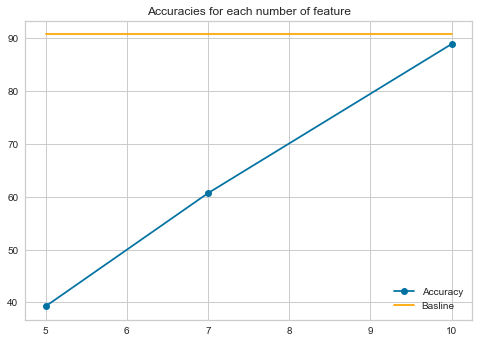

In [155]:
k_accuracies(Baseline_dt,fs_dt)

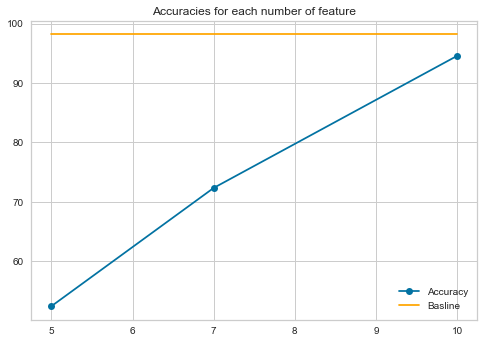

In [156]:
k_accuracies(Baseline_svm,fs_svm)

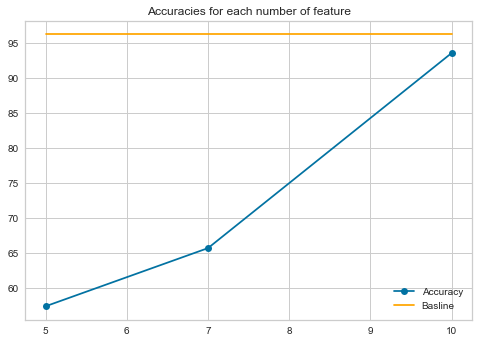

In [160]:
k_accuracies(Baseline_gb,fs_gb)

Text(0.5, 1.0, 'TSNE Cluster Plot')

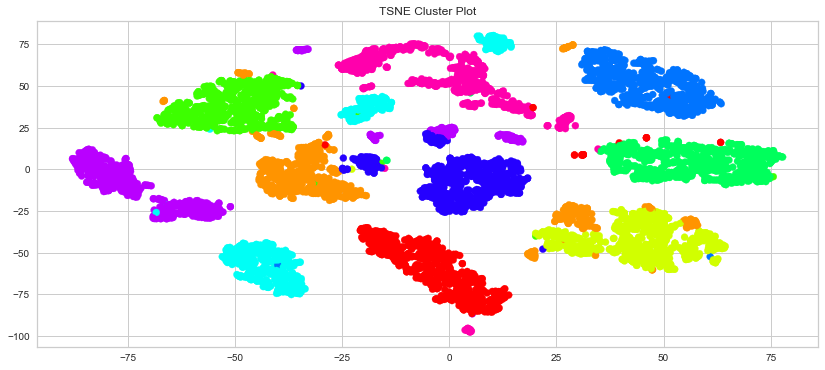

In [24]:
tsne_train = TSNE(n_components=2).fit_transform(X_train)
max_label = max(y_train)+1
label_subset = [cm.hsv(i/max_label) for i in y_train.values]
f, ax = plt.subplots(1, figsize=(14, 6))
ax.scatter(tsne_train[:, 0], tsne_train[:, 1], c=label_subset)
ax.set_title('TSNE Cluster Plot')


Text(0.5, 1.0, 'TSNE Cluster Plot')

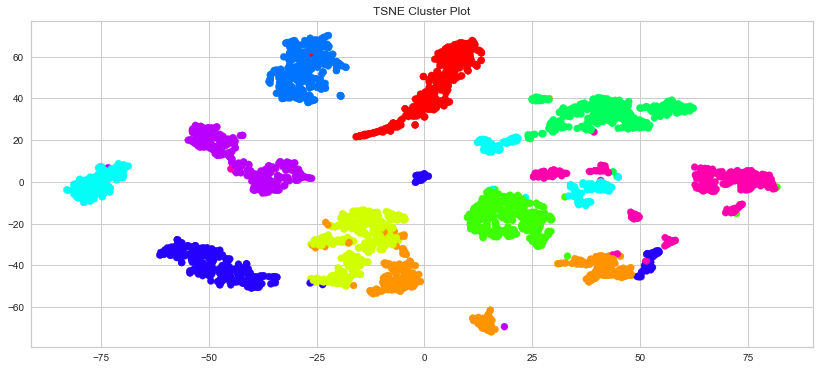

In [25]:
tsne_test = TSNE(n_components=2).fit_transform(X_test)
max_label = max(y_test)+1
label_subset = [cm.hsv(i/max_label) for i in y_test.values]
f, ax = plt.subplots(1, figsize=(14, 6))
ax.scatter(tsne_test[:, 0], tsne_test[:, 1], c=label_subset)
ax.set_title('TSNE Cluster Plot')


In [161]:
def ploting_tsne(features, labels):
    for i in [5,7,10]:
        X_train_selected = SelectKBest(chi2, k=i).fit_transform(features, labels)
        tsne = TSNE(n_components=2).fit_transform(X_train_selected)
        max_label = max(labels)+1
        label_subset = [cm.hsv(i/max_label) for i in labels]
        f, ax = plt.subplots(1, figsize=(14, 6))
        ax.scatter(tsne[:, 0], tsne[:, 1], c=label_subset)
        ax.set_title('TSNE Cluster Plot.{}'.format(i))

    

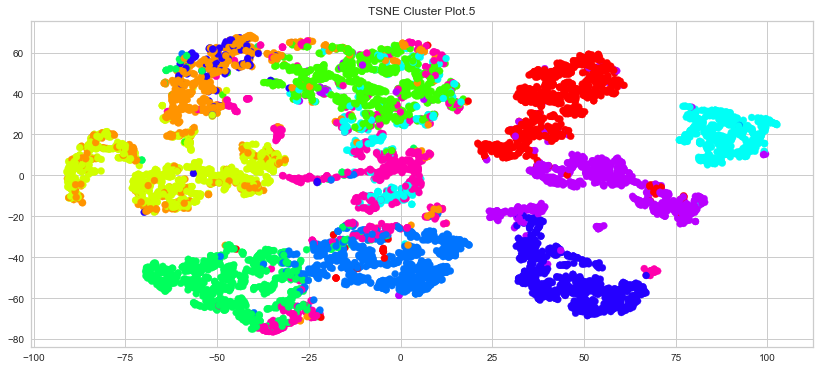

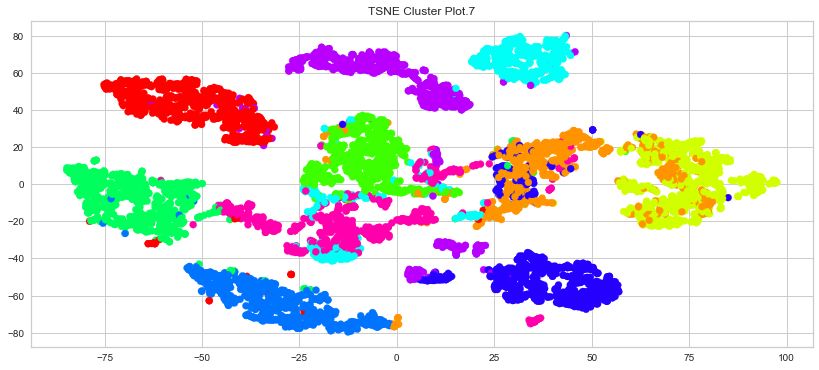

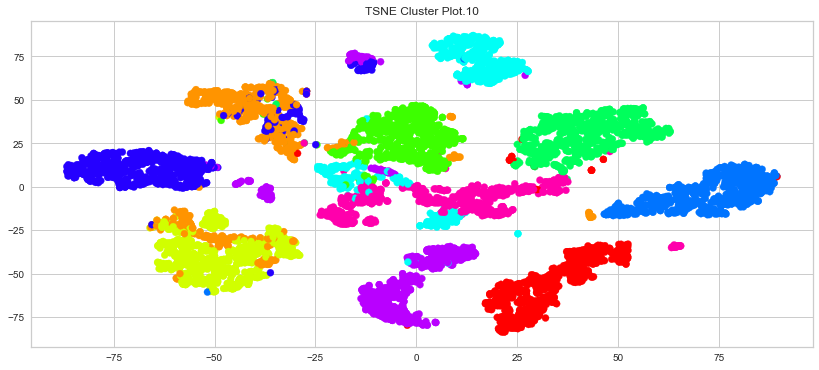

In [162]:
ploting_tsne(X_train,y_train)

### Hyper Paramter Tuning 

In [47]:
def plotHyperParamter(Accuracy, Hyperparamter , x , y, Model,):
    x_axis = Accuracy
    Baseline_dt = [90.764]
    Baseline_svm = [98.169]
    Baseline_gb = [96.169]  
    length = len(x_axis)
    fig, ax = plt.subplots()
    ax.plot(Accuracy, Hyperparamter ,marker='o', label = "Accuracies")
    if Model == "SVM":
        Baseline_svm = Baseline_svm*length
        ax.plot(x_axis ,Baseline_svm ,color='orange',  label="Basline")
    elif Model == "DecisionTree":
        Baseline_dt = Baseline_dt*length
        ax.plot(x_axis ,Baseline_dt ,color='orange',  label="Basline")
    else:
        Baseline_nb = Baseline_gb*length
        ax.plot(x_axis ,Baseline_nb ,color='orange',  label="Basline")
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title(Model)
    plt.show()

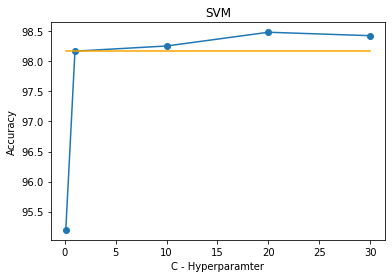

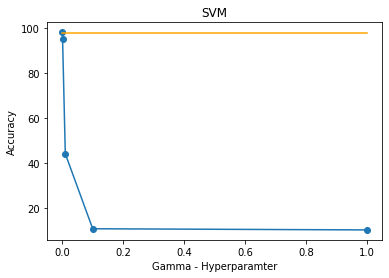

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ....................C=0.1, gamma=1;, score=0.294 total time=   3.5s
[CV 2/5] END ....................C=0.1, gamma=1;, score=0.199 total time=   3.0s
[CV 3/5] END ....................C=0.1, gamma=1;, score=0.195 total time=   2.9s
[CV 4/5] END ....................C=0.1, gamma=1;, score=0.293 total time=   2.9s
[CV 5/5] END ....................C=0.1, gamma=1;, score=0.196 total time=   3.1s
[CV 1/5] END ..................C=0.1, gamma=0.1;, score=0.105 total time=   3.6s
[CV 2/5] END ..................C=0.1, gamma=0.1;, score=0.104 total time=   3.5s
[CV 3/5] END ..................C=0.1, gamma=0.1;, score=0.104 total time=   3.5s
[CV 4/5] END ..................C=0.1, gamma=0.1;, score=0.104 total time=   3.5s
[CV 5/5] END ..................C=0.1, gamma=0.1;, score=0.105 total time=   3.5s
[CV 1/5] END .................C=0.1, gamma=0.01;, score=0.157 total time=   3.6s
[CV 2/5] END .................C=0.1, gamma=0.01

In [48]:

Tune_c = []
Tune_gamma =[]
acuuracy_With_C =[]
acuuracy_With_gamma =[]


# Tuning the C in the SVM
for i in [0.1, 1, 10, 20, 30]:
    model = svm.SVC(C = i)
    model.fit(X_train, y_train)
    #print prediction results
    predictions = model.predict(X_test)
    #print(classification_report(y_test, predictions))
    Tune_c.append(i)
    acuuracy_With_C.append(accuracy_score(y_test,predictions)*100)
    
    
plotHyperParamter(Tune_c, acuuracy_With_C , "C - Hyperparamter" , "Accuracy" , "SVM")
    
    
#Tune the gamma in svm
for i in [1, 0.1, 0.01, 0.001, 0.0001]:
    model = svm.SVC(gamma = i)
    model.fit(X_train, y_train)
    # print prediction results
    predictions = model.predict(X_test)
    #print(classification_report(y_test, predictions))
    Tune_gamma.append(i)
    acuuracy_With_gamma.append(accuracy_score(y_test,predictions)*100)
    
    
plotHyperParamter(Tune_gamma, acuuracy_With_gamma , "Gamma - Hyperparamter" , "Accuracy" , "SVM")

param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001]}
grid = GridSearchCV(svm.SVC(), param_grid, refit = True, verbose = 3)
grid.fit(X_train, y_train)
print(grid.best_params_)
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)
grid_predictions_svm = grid.predict(X_test)
# print classification report
print(classification_report(y_test, grid_predictions_svm))
print(" SVM Test Accuracy : ", accuracy_score(y_test,grid_predictions_svm)*100)




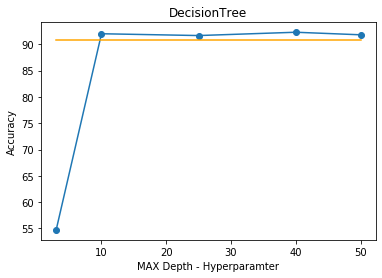

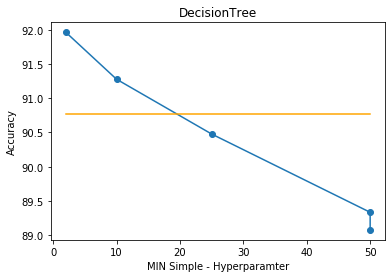

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ..max_depth=3, min_samples_split=2;, score=0.580 total time=   0.0s
[CV 2/5] END ..max_depth=3, min_samples_split=2;, score=0.602 total time=   0.0s
[CV 3/5] END ..max_depth=3, min_samples_split=2;, score=0.565 total time=   0.0s
[CV 4/5] END ..max_depth=3, min_samples_split=2;, score=0.559 total time=   0.0s
[CV 5/5] END ..max_depth=3, min_samples_split=2;, score=0.596 total time=   0.0s
[CV 1/5] END .max_depth=3, min_samples_split=10;, score=0.580 total time=   0.0s
[CV 2/5] END .max_depth=3, min_samples_split=10;, score=0.602 total time=   0.0s
[CV 3/5] END .max_depth=3, min_samples_split=10;, score=0.565 total time=   0.0s
[CV 4/5] END .max_depth=3, min_samples_split=10;, score=0.559 total time=   0.0s
[CV 5/5] END .max_depth=3, min_samples_split=10;, score=0.596 total time=   0.0s
[CV 1/5] END .max_depth=3, min_samples_split=25;, score=0.580 total time=   0.0s
[CV 2/5] END .max_depth=3, min_samples_split=25

In [50]:
Tune_Max_Depth = []
Tune_min_samples_split =[]
acuuracy_With_Max_Depth =[]
acuuracy_With_min_samples_split =[]

for i in [3, 10, 25, 40, 50]:
    model = DecisionTreeClassifier(max_depth=i)
    model.fit(X_train, y_train)
    #print prediction results
    predictions = model.predict(X_test)
    #print(classification_report(y_test, predictions))
    Tune_Max_Depth.append(i)
    acuuracy_With_Max_Depth.append(accuracy_score(y_test,predictions)*100)
    
plotHyperParamter(Tune_Max_Depth, acuuracy_With_Max_Depth , "MAX Depth - Hyperparamter" , "Accuracy" , "DecisionTree")
    
    
#Tune the gamma in svm
for i in [2, 10, 25, 50, 50]:
    model = DecisionTreeClassifier(min_samples_split = i)
    model.fit(X_train, y_train)
    # print prediction results
    predictions = model.predict(X_test)
    #print(classification_report(y_test, predictions))
    Tune_min_samples_split.append(i)
    acuuracy_With_min_samples_split.append(accuracy_score(y_test,predictions)*100)
    
plotHyperParamter(Tune_min_samples_split, acuuracy_With_min_samples_split , "MIN Simple - Hyperparamter" , "Accuracy" , "DecisionTree")
param_grid_DecisionTree= {'max_depth': [3, 10, 25, 40, 50], 
              'min_samples_split': [2, 10, 25, 50, 50]}
grid_DecisionTree = GridSearchCV(DecisionTreeClassifier(), param_grid_DecisionTree, refit = True, verbose = 3)
grid_DecisionTree.fit(X_train, y_train)
print(grid_DecisionTree.best_params_)
# print how our model looks after hyper-parameter tuning
print(grid_DecisionTree.best_estimator_)
grid_predictions_dt = grid_DecisionTree.predict(X_test)
# print classification report
print(classification_report(y_test, grid_predictions_dt))
print(" Decsiosn Tree Test Accuracy : ", accuracy_score(y_test,grid_predictions_dt)*100)



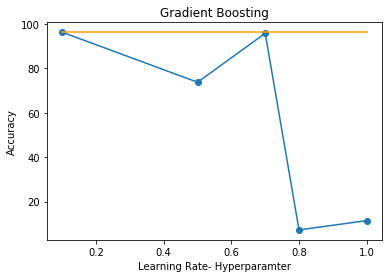

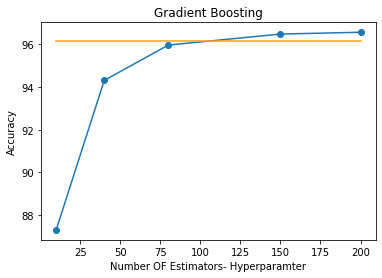

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END learning_rate=0.1, n_estimators=10;, score=0.911 total time=   1.1s
[CV 2/5] END learning_rate=0.1, n_estimators=10;, score=0.929 total time=   1.1s
[CV 3/5] END learning_rate=0.1, n_estimators=10;, score=0.919 total time=   1.1s
[CV 4/5] END learning_rate=0.1, n_estimators=10;, score=0.919 total time=   1.1s
[CV 5/5] END learning_rate=0.1, n_estimators=10;, score=0.929 total time=   1.1s
[CV 1/5] END learning_rate=0.1, n_estimators=40;, score=0.973 total time=   4.4s
[CV 2/5] END learning_rate=0.1, n_estimators=40;, score=0.979 total time=   4.3s
[CV 3/5] END learning_rate=0.1, n_estimators=40;, score=0.977 total time=   4.3s
[CV 4/5] END learning_rate=0.1, n_estimators=40;, score=0.978 total time=   4.3s
[CV 5/5] END learning_rate=0.1, n_estimators=40;, score=0.980 total time=   4.3s
[CV 1/5] END learning_rate=0.1, n_estimators=80;, score=0.983 total time=   9.0s
[CV 2/5] END learning_rate=0.1, n_estimators=80

In [52]:
Tune_Max_Sigma = []
Tune_Theta =[]
acuuracy_With_Tune_Sigma =[]
acuuracy_With_Theta =[]
from sklearn.naive_bayes import BernoulliNB

    
for i in  [0.1,0.5,0.7,0.8,1]:
    model = GradientBoostingClassifier(learning_rate=i)
    model.fit(X_train, y_train)
    #print prediction results
    predictions = model.predict(X_test)
    #print(classification_report(y_test, predictions))
    Tune_Max_Sigma.append(i)
    acuuracy_With_Tune_Sigma.append(accuracy_score(y_test,predictions)*100)
    
plotHyperParamter(Tune_Max_Sigma, acuuracy_With_Tune_Sigma , "Learning Rate- Hyperparamter" , "Accuracy" , "Gradient Boosting")
    
for i in [10,40,80, 150, 200]:
    model = GradientBoostingClassifier(n_estimators= i)
    model.fit(X_train, y_train)
    #print prediction results
    predictions = model.predict(X_test)
    #print(classification_report(y_test, predictions))
    Tune_Theta.append(i)
    acuuracy_With_Theta.append(accuracy_score(y_test,predictions)*100)
    
plotHyperParamter(Tune_Theta, acuuracy_With_Theta , "Number OF Estimators- Hyperparamter" , "Accuracy" , "Gradient Boosting")
param_grid_gb= {'learning_rate': [0.1,0.5,0.7,0.8,1], 
              'n_estimators': [10,40,80, 150, 200]}
grid_gb = GridSearchCV(GradientBoostingClassifier(), param_grid_gb, refit = True, verbose = 3)
grid_gb.fit(X_train, y_train)
print(grid_gb.best_params_)
# print how our model looks after hyper-parameter tuning
print(grid_gb.best_estimator_)
grid_predictions_gb = grid_gb.predict(X_test)
# print classification report
print(classification_report(y_test, grid_predictions_gb))

### Stacking

In [26]:
List_Of_Stacks = list()
List_Of_Stacks.append(('SVM', svm.SVC()))
List_Of_Stacks.append(('DescionTree', DecisionTreeClassifier()))
List_Of_Stacks.append(('GB',GradientBoostingClassifier()))
model_Stacking = StackingClassifier(estimators=List_Of_Stacks, final_estimator=LogisticRegression(), cv=5)
clf_Stacking = model_Stacking.fit(X_train,y_train)
predictstacking = clf_Stacking.predict(X_test)
print("classification report for ensemble model is",classification_report(predictstacking , y_test))

#print("classification report for ensemble model is",classification_report(predict , y_test))
print(" stacking Test Accuracy : ", accuracy_score(y_test,predictstacking)*100)


C:\Users\moham\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


classification report for ensemble model is               precision    recall  f1-score   support

           0       0.97      1.00      0.99       353
           1       0.95      0.95      0.95       366
           2       0.99      0.96      0.97       379
           3       0.98      0.98      0.98       336
           4       0.99      0.99      0.99       362
           5       0.98      0.99      0.99       332
           6       1.00      0.99      1.00       339
           7       0.95      0.99      0.97       349
           8       1.00      0.97      0.98       345
           9       0.98      0.98      0.98       336

    accuracy                           0.98      3497
   macro avg       0.98      0.98      0.98      3497
weighted avg       0.98      0.98      0.98      3497

 stacking Test Accuracy :  97.91249642550758


### Random Forest

In [106]:
Random_forset = RandomForestClassifier()
Random_forset.fit(X_train, y_train)
#print prediction results
predictions = model.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.80      0.83      0.82       363
           1       0.54      0.56      0.55       364
           2       0.65      0.59      0.62       364
           3       0.46      0.75      0.57       336
           4       0.78      0.98      0.87       364
           5       0.51      0.32      0.39       335
           6       0.76      0.85      0.80       336
           7       0.86      0.66      0.75       364
           8       0.51      0.50      0.51       335
           9       0.39      0.24      0.30       336

    accuracy                           0.63      3497
   macro avg       0.63      0.63      0.62      3497
weighted avg       0.63      0.63      0.62      3497



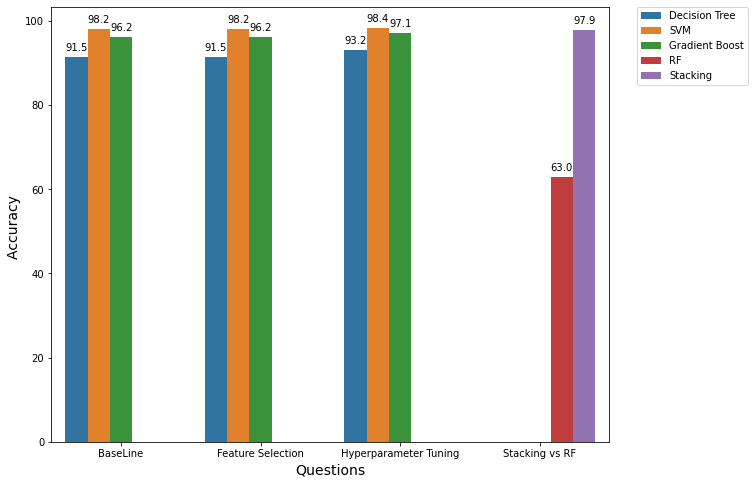

In [32]:
import seaborn as sn
plt.figure(figsize=(10, 8))
raw_data = {
    'x': ['BaseLine',          'BaseLine',         'BaseLine',
          'Feature Selection',          'Feature Selection',         'Feature Selection',
          'Hyperparameter Tuning',          'Hyperparameter Tuning',         'Hyperparameter Tuning', 
          'Stacking vs RF',          'Stacking vs RF'],
    'y': [91.507, 98.16, 96.197,
          91.507, 98.16, 96.197,
          93.19,98.39,97.12,
          63,97.9],
    'category': ['Decision Tree', 'SVM', 'Gradient Boost',
                 'Decision Tree', 'SVM', 'Gradient Boost',
                 'Decision Tree', 'SVM', 'Gradient Boost',
                 'RF', 'Stacking']
           }

g=sn.barplot(x='x', y='y', hue='category', data=raw_data)
for p in g.patches:
    g.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.xlabel("Questions", size=14)
plt.ylabel("Accuracy ", size=14)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)




SVM Matrix

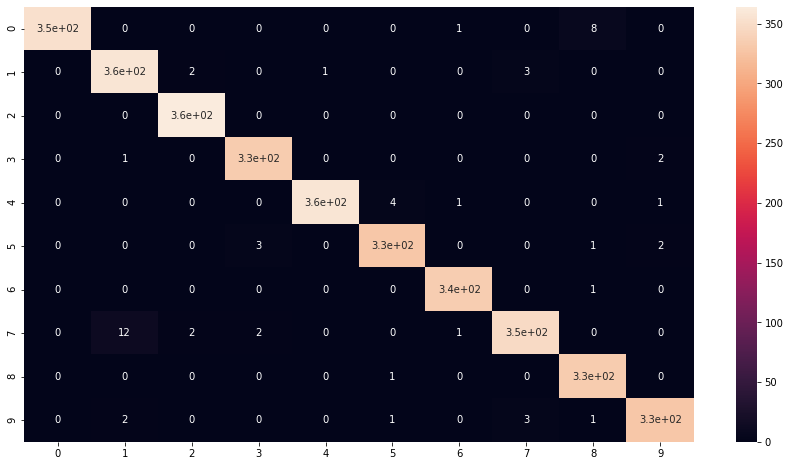

In [56]:
plt.figure(figsize=(15, 8))
sn.heatmap(confusion_matrix(y_test , grid_predictions_svm), annot=True)

In [ ]:
Stacking Rep

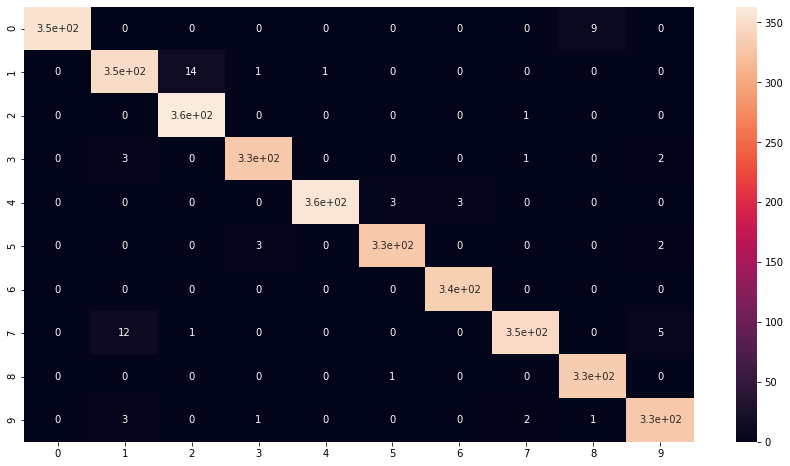

In [57]:
plt.figure(figsize=(15, 8))

sn.heatmap(confusion_matrix(y_test , predict), annot=True)